In [18]:
import matplotlib.pyplot as plt
import numpy as np
import csv


/home/pl22767/project/dtac-dev/python_scripts
PickAndPlace_64_taskaware_AE_randcrop_CNNBasedVAE_kl0.0_rec5000.0_task500.0_bs128_cov0.0_lr0.0001_seed0_DVAE_awa-999.csv


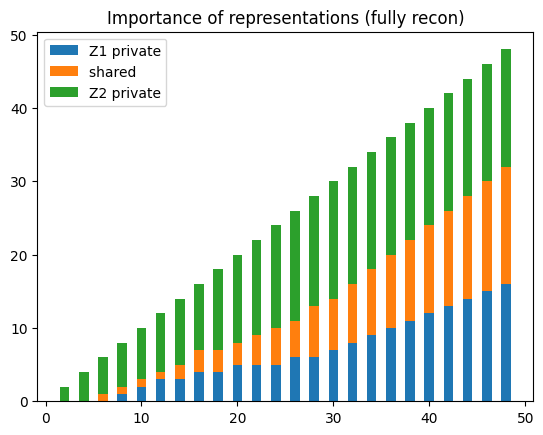

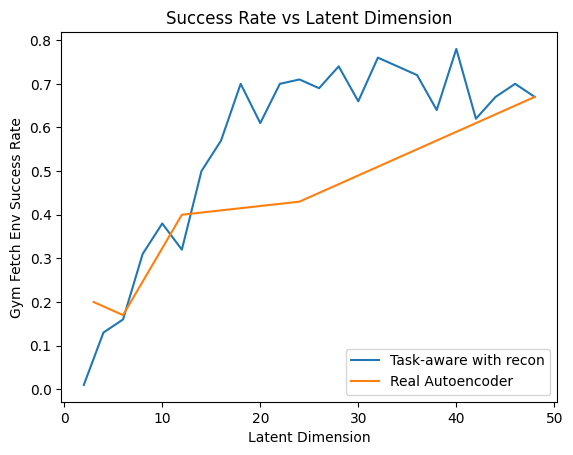

In [20]:
### Settings
view_from = '2image' # '2image' or '_side' or '_arm'
view, channel = 1, 3
if view_from == '2image':
    view, channel = 2, 6
cropTF = '_nocrop' # '_nocrop' or ''

image_cropped_size = 112 # 112
image_orig_size = 128
z_dim = 64
vae_path = './gym_fetch/models/'

beta_rec = 5000.0 # 98304.0 10000.0
batch_size = 128
beta_kl = 0.0 # 1.0 25.0
vae_model = "CNNBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 0.0
beta_task = 500.0 # task aware
VAEepoch = 999
norm_sample = False # False True
rand_crop = True # 'True' or '' or 'False'
dataset = 'PickAndPlace' # 'PickAndPlace' or 'gym_fetch'
VAE_seed = 0
lr = 1e-4
if norm_sample:
    model_type = "VAE"
else:
    model_type = "AE"
if rand_crop:
    rc = "randcrop"
else:
    rc = "nocrop"

### load csv file
# PickAndPlace_64_taskaware_AE_randcrop_CNNBasedVAE_kl0.0_rec5000.0_task500.0_bs128_cov0.0_lr0.0001_seed0_DVAE_awa-999.csv
sucess_rate = []
z_list = []
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{rc}_{vae_model}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{VAE_seed}/DVAE_awa-{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')
import os
print(os.getcwd())
print(csv_name)
with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            sucess_rate[-1].append(float(row[4]))
            rep_dims[0].append(int(row[5]))
            rep_dims[1].append(int(row[6]))
            rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, label='Z1 private')
plt.bar(z_list[0], rep_dims[1], 1, label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], 1, label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations (fully recon)')
plt.show()

label = ['Task-aware with recon', 'Fully task-aware', 'Fully recon']

### plot
for l, z, sr in zip(label, z_list, sucess_rate):
    plt.plot(z, sr, label=l)
### real learning model
plt.plot([3, 6, 12, 24, 48], [0.20, 0.17, 0.40, 0.43, 0.67], label='Real Autoencoder')

plt.ylabel("Gym Fetch Env Success Rate")
plt.xlabel("Latent Dimension")
plt.title(f"Success Rate vs Latent Dimension") # \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.legend()
plt.show()
